In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
edgap = pd.read_excel(
    # 'https://raw.githubusercontent.com/brian-fischer/DATA-5100/main/EdGap_data.xlsx',
    'https://github.com/benjaminjonjessop/education/raw/refs/heads/main/data/EdGap_data.xlsx',
    dtype={'NCESSCH School ID': object}
)

HTTPError: HTTP Error 404: Not Found

In [19]:
import pandas as pd

school_information = pd.read_csv(
    '/Users/jessopb/Library/CloudStorage/WorkDocsDrive-Documents/Personal - jessopb/Seattle University Data Science Certificate/DATA 5100/education/data/ccd_sch_029_1617_w_1a_11212017.csv',
    encoding="unicode_escape"
)


/var/folders/w2/lcc2w2s94195l_lxq2ln21c40000gq/T/ipykernel_63911/83120850.py:3: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv(


In [20]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [21]:
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [22]:
pd.set_option('display.max_columns', None)

school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,MSTREET1,MSTREET2,MSTREET3,MCITY,MSTATE,MZIP,MZIP4,LSTREET1,LSTREET2,LSTREET3,LCITY,LSTATE,LZIP,LZIP4,PHONE,WEBSITE,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,SCH_TYPE_TEXT,SCH_TYPE,RECON_STATUS,OUT_OF_STATE_FLAG,CHARTER_TEXT,CHARTAUTH1,CHARTAUTHN1,CHARTAUTH2,CHARTAUTHN2,NOGRADES,G_PK_OFFERED,G_KG_OFFERED,G_1_OFFERED,G_2_OFFERED,G_3_OFFERED,G_4_OFFERED,G_5_OFFERED,G_6_OFFERED,G_7_OFFERED,G_8_OFFERED,G_9_OFFERED,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0020,1.000020e+10,100277.0,P O Box 9486,NaN,NaN,Birmingham,AL,35220,NaN,1000 Industrial School Road,NaN,NaN,Birmingham,AL,35220,NaN,(205)680-8574,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0050,1.000020e+10,101667.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,1601 County Rd. 57,NaN,NaN,Prattville,AL,36067,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0060,1.000020e+10,101670.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,2109 Bashi Rd Bldg 509,NaN,NaN,Thomasville,AL,36784,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0030,1.000020e+10,101705.0,P O Box 66,NaN,NaN,Mount Meigs,AL,36057,NaN,1000 Industrial School Road,NaN,NaN,Mount Meigs,AL,36057,NaN,(334)215-6039,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0040,1.000020e+10,101706.0,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,(205)838-4981,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [23]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [24]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

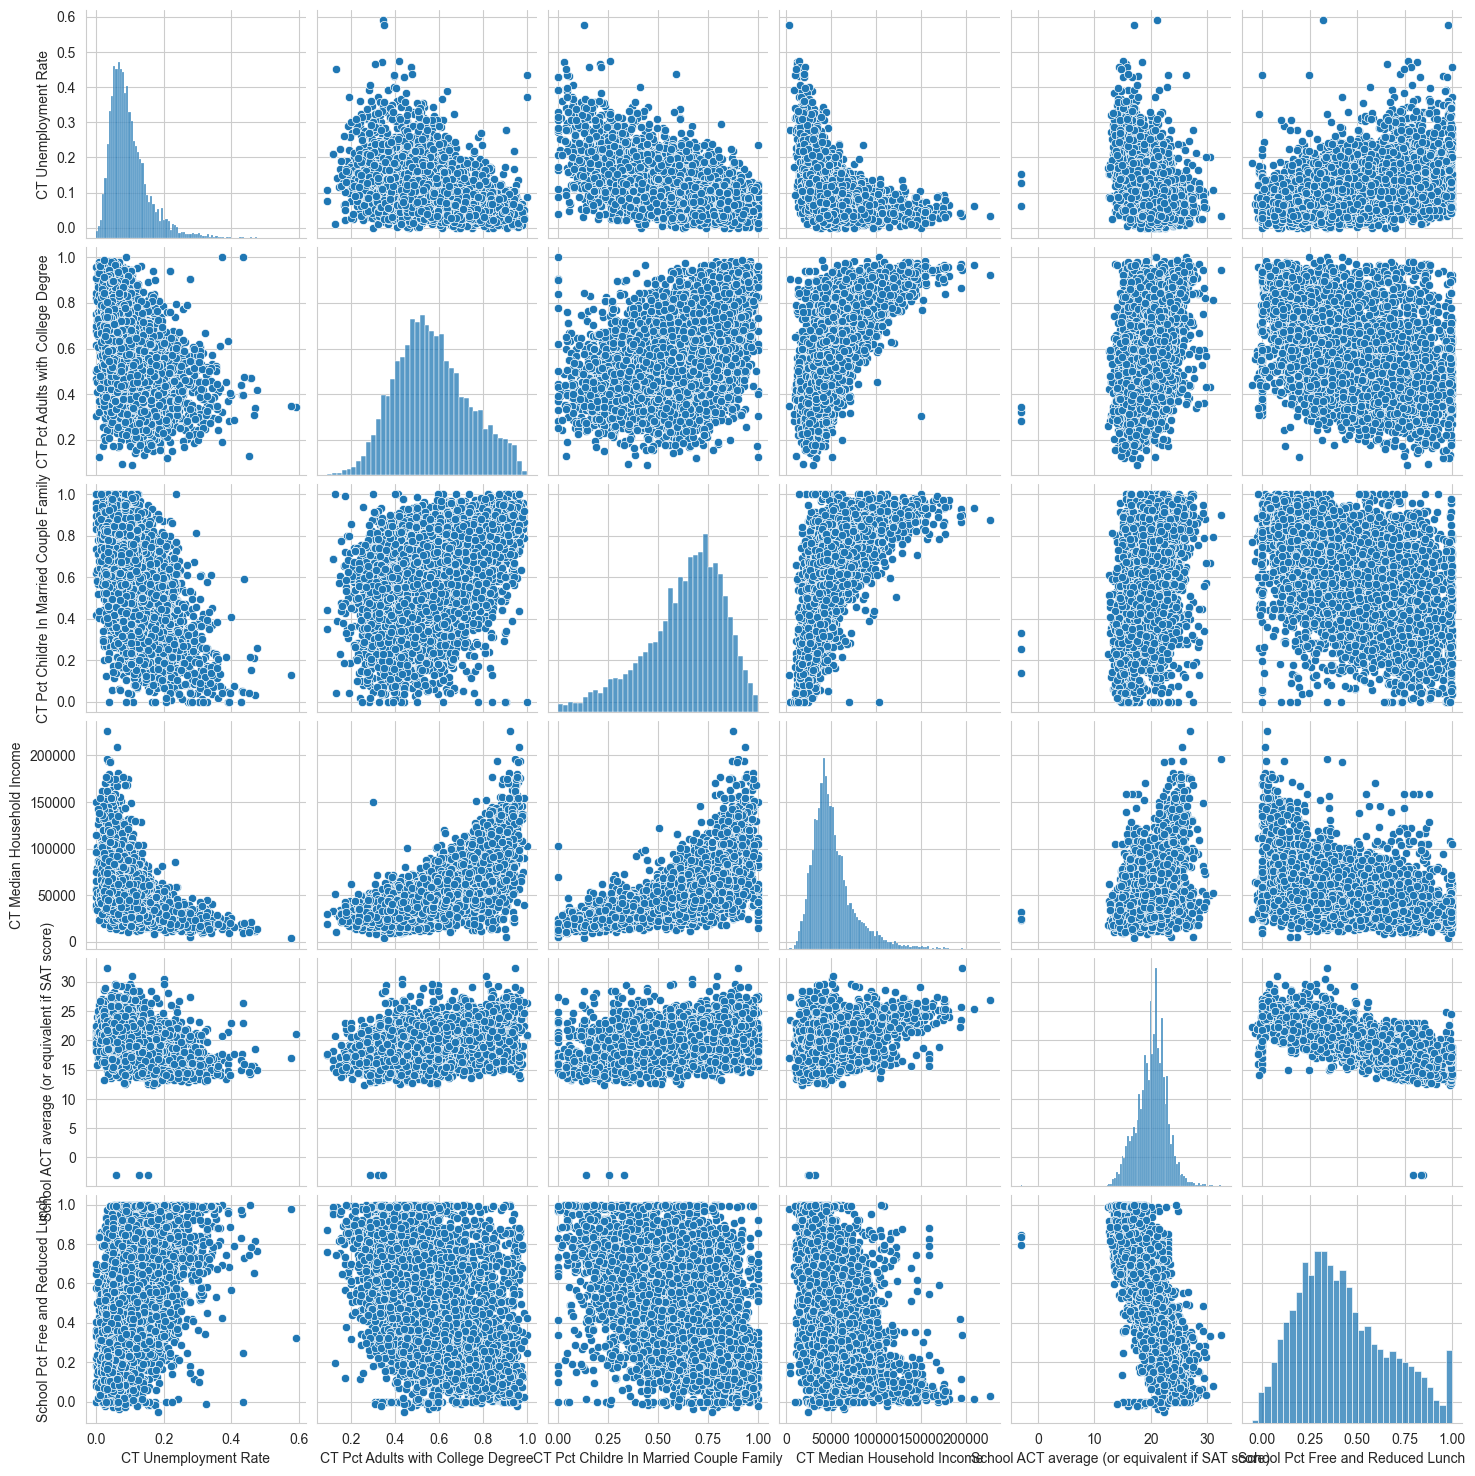

In [25]:
sns.pairplot(
    edgap.drop(columns='NCESSCH School ID')
);
plt.show()

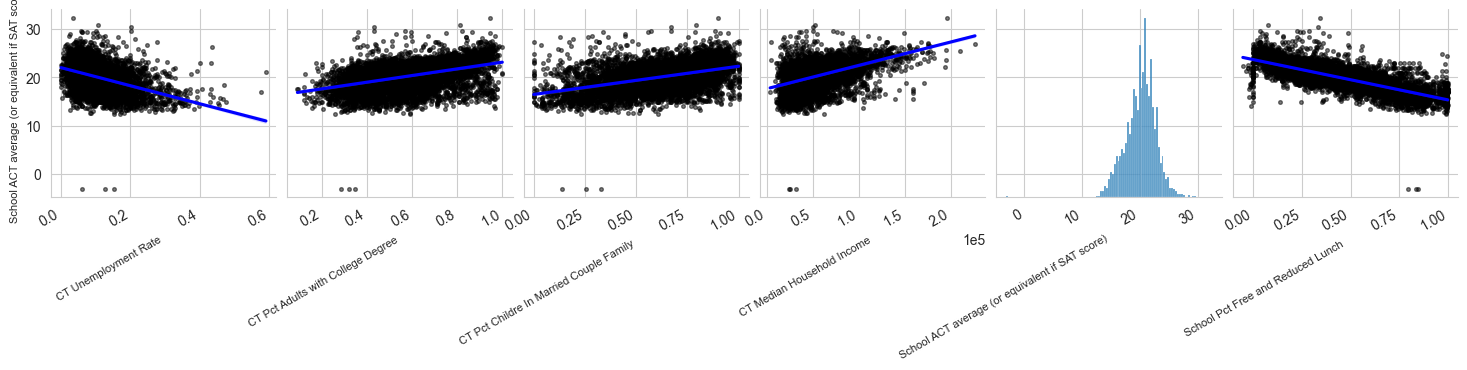

In [26]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    y_vars=['School ACT average (or equivalent if SAT score)'],
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

In [27]:
school_information = school_information[
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

In [28]:
school_information.head()

,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


In [29]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

In [30]:
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter"
    }
)

In [31]:
school_information['id'] = school_information['id'].astype('object')

In [32]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


In [33]:
df = edgap.merge(
    school_information,
    how='left',
    on='id'
)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
dtypes: float64(6), object(7)
memory usage: 811.2+ KB


In [35]:
df.describe()

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
count,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000
mean,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651
std,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754
min,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545
25%,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501
50%,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570
75%,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447
max,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729


In [36]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
min,0.00,0.09,0.0,3589.0,-3.07,-0.05
max,0.59,1.00,1.0,226181.0,32.36,1.00


In [37]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [38]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

In [39]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [40]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [41]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

In [42]:
df = df.loc[df['school_level'] == 'High']

In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


In [45]:
percent_missing = df.isna().mean().round(4) * 100

percent_missing.to_frame(name='Percent Missing Values')

,Percent Missing Values
id,0.00
rate_unemployment,0.17
percent_college,0.15
percent_married,0.28
median_income,0.22
average_act,0.04
percent_lunch,0.28
year,0.00
state,0.00
zip_code,0.00


In [46]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [47]:
df['state'].nunique()

20

In [49]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 30.4 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]
Note: you may need to restart the kernel to use updated packages.


In [50]:
import plotly.offline as po
import plotly.graph_objs as pg

In [51]:
layout = dict(
    geo={"scope": "usa"}, coloraxis_colorbar=dict(title="Number of Schools")
)

data = dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis",
)

x = pg.Figure(data=[data], layout=layout)

po.iplot(x)

In [52]:
df = df.dropna(subset=['average_act'])

In [53]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


In [54]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter'
]

In [61]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 43.9 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 46.8 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [62]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [63]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


In [65]:
imputer = IterativeImputer()

In [66]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

In [67]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

In [68]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


In [69]:
df.to_csv(
    'education_clean.csv',
    encoding='utf-8-sig',
    index=False
)